## 모두의 딥러닝 개정 3판
### 다섯째마당. 딥러닝 활용하기

### 2 LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기  
 - 긴 텍스트를 읽고 데이터의 의미를 카테고리로 분류.  
 - 로이터 뉴스 데이터는 총 1만 1,228개의 뉴스 기사, 46개의 카테고리로 이루어진 대용량 텍스트 데이터.  
  

In [ ]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 불러온 데이터를 학습셋과 데이터셋으로 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
# 데이터 확인 후, 출력
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])                                                               # 첫 번째 기사 출력, 빈도에 따라 번호 붙임

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
from tensorflow.keras.preprocessing import sequence                             # 데이터 전처리 함수 sequence()

# 단어의 수를 맞춰줌
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [ ]:
# y 데이터에 원-핫 인코딩 처리를 하여 데이터 전처리
from tensorflow import keras

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

네트워크 구조:  
1) Embedding 층  
 - 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알 수 있는 형태로 변환.  
 - Embedding('불러온 단어 총 갯수','기사당 단어 갯수') 형식. 모델 설정 부분의 가장 앞에 위치.   
   
2) LSTM 층  
 - RNN에서 기억 값에 대한 가중치를 제어.  
 - LSTM(기사당 단어수, 기타옵션)  
 - 주로 활성화 함수 tanh 사용.  
   
3) 완전연결층

In [ ]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [ ]:
# 모델의 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단 설정 EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)         # monitor='모니터링할 지표', patience='개선없음을 판단하기 전 대기할 에폭 수'

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data = (X_test, y_test), callbacks=[early_stopping_callback])

# 23번째 에포크에서 학습 자동 중단. 정확도 71.50%.

Epoch 1/200
450/450 [==============================] - 36s 75ms/step - loss: 2.1807 - accuracy: 0.4560 - val_loss: 2.3972 - val_accuracy: 0.3976
Epoch 2/200
450/450 [==============================] - 34s 76ms/step - loss: 1.9116 - accuracy: 0.5138 - val_loss: 1.7634 - val_accuracy: 0.5632
Epoch 3/200
450/450 [==============================] - 34s 76ms/step - loss: 1.7411 - accuracy: 0.5561 - val_loss: 1.7048 - val_accuracy: 0.5744
Epoch 4/200
450/450 [==============================] - 34s 76ms/step - loss: 1.6911 - accuracy: 0.5677 - val_loss: 1.7287 - val_accuracy: 0.5583
Epoch 5/200
450/450 [==============================] - 34s 76ms/step - loss: 1.6054 - accuracy: 0.5904 - val_loss: 1.7347 - val_accuracy: 0.5775
Epoch 6/200
450/450 [==============================] - 36s 80ms/step - loss: 1.5774 - accuracy: 0.6098 - val_loss: 1.5943 - val_accuracy: 0.6082
Epoch 7/200
450/450 [==============================] - 37s 82ms/step - loss: 1.4675 - accuracy: 0.6345 - val_loss: 1.5523 - val_ac

71/71 [==============================] - 2s 23ms/step - loss: 1.2702 - accuracy: 0.7150

 Test Accuracy: 0.7150


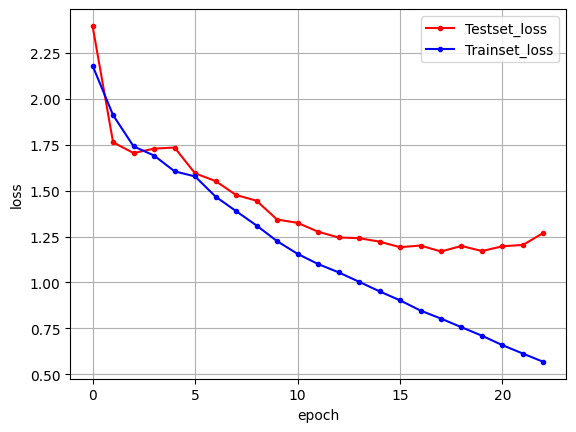

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드, 레이블 추가
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 그래프를 통해 테스트셋의 오차가 상승할 때 학습이 멈추었음을 알 수 있음.
# 학습 시 정확도는 계속 상승하는데, 검증 데이터를 사용하였을 때의 정확도가 지속적으로 하강한다면 오버피팅 발생한 것.